# Data Preprocessing Project – Feature Scaling



## Table of Contents


1.	Introduction

2.	Normalizing data with MinMaxScaler

3.	Standardising data with StandardScaler


## 1. Introduction

<img src="https://miro.medium.com/max/1250/1*yR54MSI1jjnf2QeGtt57PA.png">

One of the most important data preprocessing step, we need to apply to our data is feature scaling. When we encounter any real world data set, the independent or feature variables may be mapped onto different scales.

This could cause some problems like feature with a higher value range make the model biased to this feature and it starts dominating .

we need to do scaling so that one significant number doesn’t impact the model just because of their large magnitude.

**Feature scaling** refers to procedures used to standardize these independent or feature variables so that they are mapped onto same scales.


Most of the ML algorithms perform well when the feature variables are mapped onto the same scale. They don’t perform well when features are mapped onto different scales. For example, in stochastic gradient descent, feature scaling can improve the convergence speed of the algorithm. In support vector machines, it can reduce the time to find support vectors. 


But, there are few exceptions as well. Decision trees and random forests are two of the algorithms where we don’t need to worry about feature scaling. These algorithms are scale invariant. Similarly, Naive Bayes and Linear Discriminant Analysis are not affected by feature scaling. In Short, any Algorithm which is not distance based is not affected by feature scaling.

So, let’s start our discussion of various techniques associated with feature scaling.

<hr>

### There are 2 methods

1. Normalization with `MinMaxScaler`
2. Standardization with `StandardScaler`

**Advantages**<br>

- Normalization: shrinks the range such that the range is now between 0 and 1 .
- Standardization: scales features such that the distribution is centered around 0, with a standard deviation of 1.


**Disadvantages**<br>

- Normalization: get influenced heavily by outliers (i.e. extreme values).
- Standardization: not good if the data is not normally distributed (i.e. no Gaussian Distribution).





In [17]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

%matplotlib inline
sns.set(rc={'figure.figsize': [10, 10]}, font_scale=1.3)

In [18]:
# ignore the warnings

import warnings
warnings.filterwarnings("ignore")

## 2. Normalizing data with MinMaxScaler


This technique of rescaling is also called **min-max scaling** or **min-max normalization**. **Normalization** refers to the rescaling of the features to a range of [0, 1], which is a special case of min-max scaling. So, in this technique, values are shifted and rescaled so that they end up ranging from zero to one. We do this by subtracting the minimum value (xmin ) and dividing by the maximum value (xmax ) minus the minimum value (xmin ). 


Mathematically, the new value x(i)norm of a sample x(i) can be calculated as follows:-

 
		     x(i)norm  =  (xi-  xmin )/(xmax-  xmin )
             
	
Here, x(i) is a particular sample value. xmax and xmin is the maximum and minimum feature value in a column.

	
Scikit-Learn provides a transformer called **MinMaxScaler** for this task. It has a feature range parameter to adjust the range of values. This estimator fit and transform each feature variable individually such that it is in the given range (between zero and one) on the training set. 

**MinMaxScaler** works well for the cases when the distribution is not normal or when the standard deviation is very small. But, it has one drawback. It is sensitive to outliers


The syntax for implementing min-max scaling procedure in Scikit-Learn is given as follows:- 


`from sklearn.preprocessing import MinMaxScaler`

`ms = MinMaxScaler()`

`X_train_ms = ms.fit_transform(X_train)`

`X_test_ms = ms.transform(X_test)`


## 3. Standardising data with StandardScaler


There is another practical approach for feature scaling which might be more useful in certain circumstances. It is called **standardization**. It can be more useful for many machine learning algorithms, especially for optimization algorithms such as gradient descent.


In **standardization**, first we determine the distribution mean and standard deviation for each feature. Next we subtract the mean from each feature. Then we divide the values of each feature by its standard deviation. So, in standardization, we center the feature columns at mean 0 with standard deviation 1 so that the feature columns takes the form of a normal distribution, which makes it easier to learn the weights.


Scikit-Learn provides a transformer called **StandardScaler** for standardization. The **StandardScaler** transformer assumes that the data is normally distributed within each feature and it will scale them such that the distribution is centered around 0 and and have a standard deviation of 1.


Mathematically, **standardization** can be expressed by the following equation: 


		x(i)std =  ( x(i)- μx)/(σx )


Here, x(i) is a particular sample value and x(i)std is its standard deviation , μx is the sample mean of a particular feature column and σx is the corresponding standard deviation.


Min-max scaling scales the data to a limited range of values. Unlike min-max scaling, standardization does not bound values to a specific range. So, standardization is much less affected by outliers. Standardization maintains useful information about outliers and is much less affected by them. It makes the algorithm less sensitive to outliers in contrast to min-max scaling. 


The syntax to implement standardization is quite similar to min-max scaling given as follows :-


`from sklearn.preprocessing import StandardScaler`

`ss = StandardScaler()`

`X_train_ss = ss.fit_transform(X_train)`

`X_test_ss = ss.transform(X_test)`


### 4- Robust Scaler

In [19]:
# read tips dataset from sns
df = sns.load_dataset('tips')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [20]:
# import scalers & train_test_split
from sklearn.preprocessing import RobustScaler, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split

In [21]:
# take an instance from the scaler
scaler = RobustScaler()

In [22]:
# split data into features and target
X = df.drop('smoker' , axis =1)
y = df['smoker']

In [23]:
# split data into train & test
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.2 )

In [24]:
# fit & transform ['tip' , 'total_bill']
X_train[['tip' , 'total_bill']] = scaler.fit_transform(X_train[['tip' , 'total_bill']])

In [25]:
# show X_train
X_train

,total_bill,tip,sex,day,time,size
0,-0.057061,-1.073746,Female,Sun,Dinner,2
80,0.175939,0.100295,Male,Thur,Lunch,2
162,-0.131241,-0.489676,Female,Sun,Dinner,3
90,1.082263,0.100295,Male,Fri,Dinner,2
202,-0.436519,-0.489676,Female,Thur,Lunch,2
...,...,...,...,...,...,...
150,-0.334760,-0.194690,Male,Sun,Dinner,2
238,1.734665,1.085546,Female,Sat,Dinner,3
187,1.223966,-0.489676,Male,Sun,Dinner,5
3,0.579173,0.283186,Male,Sun,Dinner,2


## Real world data example

In [26]:
# read tips data again
df = sns.load_dataset('tips')
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [27]:
# describe
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


<Axes: xlabel='total_bill', ylabel='Density'>

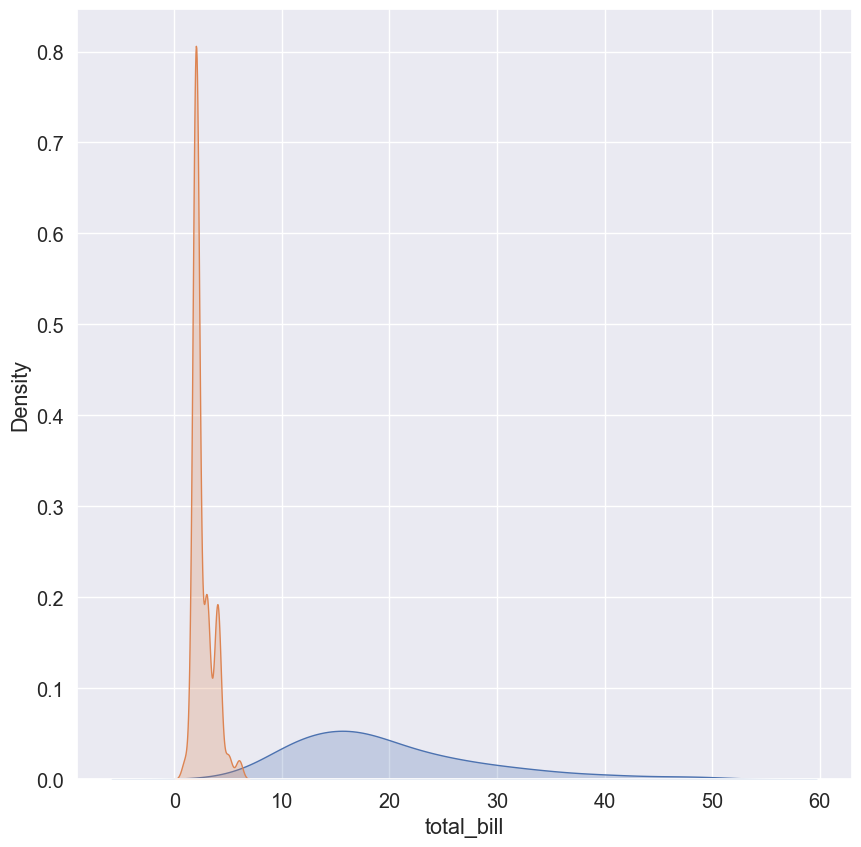

In [28]:
# show kdeplot for total_bill & size
sns.kdeplot(df['total_bill'], shade=True)
sns.kdeplot(df['size'], shade=True)

In [29]:
# take an instance from standardscaler
scaler = StandardScaler()
# solit data into features & target
X = df.drop('tip', axis=1)
y = df['tip']
# show X
X

,total_bill,sex,smoker,day,time,size
0,16.99,Female,No,Sun,Dinner,2
1,10.34,Male,No,Sun,Dinner,3
2,21.01,Male,No,Sun,Dinner,3
3,23.68,Male,No,Sun,Dinner,2
4,24.59,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...
239,29.03,Male,No,Sat,Dinner,3
240,27.18,Female,Yes,Sat,Dinner,2
241,22.67,Male,Yes,Sat,Dinner,2
242,17.82,Male,No,Sat,Dinner,2


In [30]:
# split data into train & test 
X_train, X_test, y_train, y_test = train_test_split(X, y)
# show X_train
X_train

,total_bill,sex,smoker,day,time,size
206,26.59,Male,Yes,Sat,Dinner,3
109,14.31,Female,Yes,Sat,Dinner,2
39,31.27,Male,No,Sat,Dinner,3
218,7.74,Male,Yes,Sat,Dinner,2
75,10.51,Male,No,Sat,Dinner,2
...,...,...,...,...,...,...
98,21.01,Male,Yes,Fri,Dinner,2
187,30.46,Male,Yes,Sun,Dinner,5
94,22.75,Female,No,Fri,Dinner,2
184,40.55,Male,Yes,Sun,Dinner,2


In [31]:
# provide cols to scale
columns = ['total_bill', 'size']
# fit the scaler on train
scaler.fit(X_train[columns])
# transform both X_tarin & X_test
X_train[columns] = scaler.transform(X_train[columns])
X_test[columns] = scaler.transform(X_test[columns])

In [32]:
# show X_train
X_train

,total_bill,sex,smoker,day,time,size
206,0.690329,Male,Yes,Sat,Dinner,0.394878
109,-0.626292,Female,Yes,Sat,Dinner,-0.608770
39,1.192104,Male,No,Sat,Dinner,0.394878
218,-1.330706,Male,Yes,Sat,Dinner,-0.608770
75,-1.033716,Male,No,Sat,Dinner,-0.608770
...,...,...,...,...,...,...
98,0.092060,Male,Yes,Fri,Dinner,-0.608770
187,1.105258,Male,Yes,Sun,Dinner,2.402174
94,0.278617,Female,No,Fri,Dinner,-0.608770
184,2.187075,Male,Yes,Sun,Dinner,-0.608770


In [33]:
# show X_test
X_test

,total_bill,sex,smoker,day,time,size
6,-1.220273,Male,No,Sun,Dinner,-0.608770
26,-0.727076,Male,No,Sat,Dinner,-0.608770
27,-0.799983,Male,No,Sat,Dinner,-0.608770
129,0.286122,Male,No,Thur,Lunch,0.394878
146,-0.162044,Female,No,Thur,Lunch,0.394878
...,...,...,...,...,...,...
40,-0.440807,Male,No,Sat,Dinner,0.394878
171,-0.465467,Male,Yes,Sat,Dinner,-0.608770
154,-0.040889,Male,No,Sun,Dinner,1.398526
231,-0.478333,Male,Yes,Sat,Dinner,0.394878


<Axes: xlabel='total_bill', ylabel='Density'>

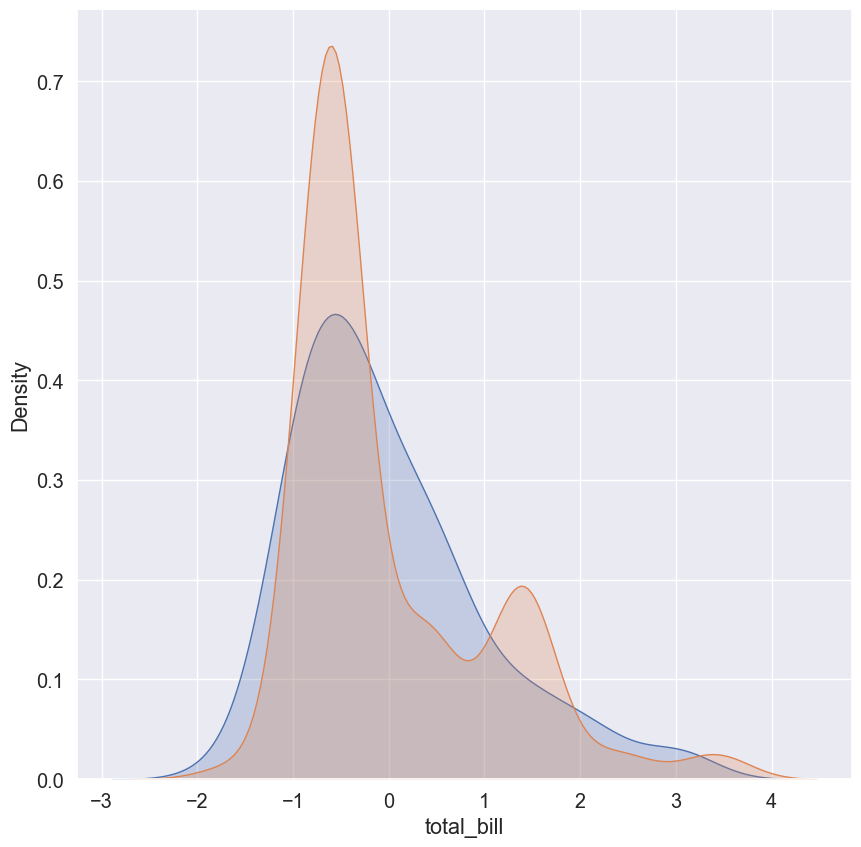

In [34]:
# show kdeplot for both total_bill & size
sns.kdeplot(X_train['total_bill'], shade=True)
sns.kdeplot(X_train['size'], shade=True)

# Great Work!